In [1]:
import pandas as pd
import geopandas as gpd

In [15]:
OD_matrix = gpd.read_file('/home/rishav/Programs/move_od copy/generated_OD/Hamilton_TN_2021-01-31_2021-02-24/subsets/all_trips/union_2021-02-01_all_trips.csv')

In [16]:
# OD_matrix = OD_matrix[['pickup_lat', 'pickup_lon', 'dropoff_lat', 'dropoff_lon', 'pickup_time_secs']]
OD_matrix = OD_matrix.set_crs('epsg:4326')

In [4]:
OD_matrix.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
ham = gpd.read_file('/home/rishav/Programs/move_od copy/data_for_SUMO/tl_2019_47065_faces.shp')

/tmp/ipykernel_171105/1420144668.py:5: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  ham_boundary = gpd.GeoSeries(cascaded_union(polygons))


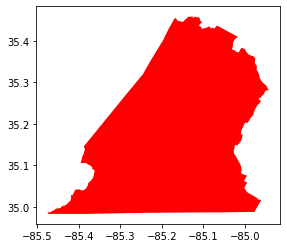

In [6]:
import matplotlib.pyplot as plt

from shapely.ops import cascaded_union
polygons = ham.geometry.to_list()
ham_boundary = gpd.GeoSeries(cascaded_union(polygons))
ham_boundary.plot(color = 'red')
plt.show()

In [7]:
chatta = gpd.read_file('./data_for_SUMO/chatta_city.geojson')

In [6]:
from pyproj import CRS

# or dictionary
crs = CRS.from_dict({'proj': 'utm', 'zone': 16, 'south': False})

print(crs.to_authority())  # ('EPSG', '32736')

('EPSG', '32616')


In [7]:
import pandas as pd
from pyproj import Transformer

from pyproj import CRS
crs = CRS.from_dict({'proj': 'utm', 'zone': 16, 'south': False})

# Load your dataframe
df = OD_matrix

# Create transformer
transformer = Transformer.from_crs("EPSG:4326", f"EPSG:{crs.to_authority()[1]}", always_xy=True)

def convert_coordinates(lat, lon):
    x, y = transformer.transform(lon, lat)
    return x, y

# Apply the conversion function
df['pickup_x'], df['pickup_y'] = zip(*df.apply(lambda row: convert_coordinates(row['pickup_lat'], row['pickup_lon']), axis=1))
df['dropoff_x'], df['dropoff_y'] = zip(*df.apply(lambda row: convert_coordinates(row['dropoff_lat'], row['dropoff_lon']), axis=1))

df.head()  # print first few rows to check


,pickup_cbg,dropoff_cbg,pickup_geom,pickup_lat,pickup_lon,dropoff_geom,dropoff_lat,dropoff_lon,visits,pickup_time,pickup_time_str,pickup_time_secs,direction,pickup_hour,geometry,pickup_x,pickup_y,dropoff_x,dropoff_y
0,470650031001,470650031001,POINT (-85.30883880464451 35.04400187671023),35.04400187671023,-85.30883880464451,POINT (-85.30828455626694 35.04042191360194),35.04042191360194,-85.30828455626694,239.0,2023-04-05 07:21:00.000000,07:21,26460.0,0,7,None,654246.293288,3.879230e+06,654303.583382,3.878834e+06
1,470650031001,470650031001,POINT (-85.30828455626694 35.04042191360194),35.04042191360194,-85.30828455626694,POINT (-85.30883880464451 35.04400187671023),35.04400187671023,-85.30883880464451,239.0,2023-04-05 17:32:00.000000,17:32,63120.0,1,17,None,654303.583382,3.878834e+06,654246.293288,3.879230e+06
2,470650004001,470650004001,POINT (-85.26818307568897 35.043932027029015),35.043932027029015,-85.26818307568897,POINT (-85.26445199999999 35.04826),35.04826,-85.26445199999999,12.0,2023-04-05 09:45:00.000000,09:45,35100.0,0,9,None,657954.911459,3.879286e+06,658286.897333,3.879772e+06
3,470650004001,470650004001,POINT (-85.26445199999999 35.04826),35.04826,-85.26445199999999,POINT (-85.26818307568897 35.043932027029015),35.043932027029015,-85.26818307568897,12.0,2023-04-05 13:07:02.204873,13:07,47222.204873,1,13,None,658286.897333,3.879772e+06,657954.911459,3.879286e+06
4,470650031001,470650031001,POINT (-85.30768854053768 35.036534358216784),35.036534358216784,-85.30768854053768,POINT (-85.31331579033834 35.039078685135216),35.039078685135216,-85.31331579033834,239.0,2023-04-05 17:33:00.000000,17:33,63180.0,1,17,None,654365.266168,3.878404e+06,653847.151112,3.878677e+06


In [18]:
import pandas as pd

from pyproj import Transformer
from pyproj import CRS
from xml.etree import ElementTree
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

# Load your dataframe
df = OD_matrix

# Create transformer
crs = CRS.from_dict({'proj': 'utm', 'zone': 16, 'south': False})
transformer = Transformer.from_crs("EPSG:4326", f"EPSG:{crs.to_authority()[1]}", always_xy=True)

def convert_coordinates(lat, lon):
    x, y = transformer.transform(lon, lat)
    return x, y

# Apply the conversion function
df['pickup_x'], df['pickup_y'] = zip(*df.apply(lambda row: convert_coordinates(row['pickup_lat'], row['pickup_lon']), axis=1))
df['dropoff_x'], df['dropoff_y'] = zip(*df.apply(lambda row: convert_coordinates(row['dropoff_lat'], row['dropoff_lon']), axis=1))

# Parse SUMO network file
net_file = '/home/rishav/Programs/move_od copy/data_for_SUMO/ham-net.osm'
tree = ElementTree.parse(net_file)
root = tree.getroot()

# Extract nodes from network file
nodes = {}
for node in root.findall('node'):
    id = node.get('id')
    x = float(node.get('lon'))
    y = float(node.get('lat'))
    nodes[id] = (x, y)

# Convert nodes to Shapely Points
node_points = [Point(x, y) for id, (x, y) in nodes.items()]

def find_nearest_node(x, y):
    p = Point(x, y)
    # print(p)
    nearest = nearest_points(p, MultiPoint(node_points))
    nearest_node_id = list(nodes.keys())[node_points.index(nearest[1])]
    return nearest_node_id

# Map coordinates to nearest node
df['pickup_node'] = df[:1].progress_apply(lambda row: find_nearest_node(row['pickup_x'], row['pickup_y']), axis=1)
df['dropoff_node'] = df[:1].progress_apply(lambda row: find_nearest_node(row['dropoff_x'], row['dropoff_y']), axis=1)

df.head()  # print first few rows to check

100%|██████████| 1/1 [00:20<00:00, 20.17s/it]


,pickup_cbg,dropoff_cbg,pickup_geom,pickup_lat,pickup_lon,dropoff_geom,dropoff_lat,dropoff_lon,visits,pickup_time,...,pickup_time_secs,direction,pickup_hour,geometry,pickup_x,pickup_y,dropoff_x,dropoff_y,pickup_node,dropoff_node
0,470650031001,470650031001,POINT (-85.30883880464451 35.04400187671023),35.04400187671023,-85.30883880464451,POINT (-85.30828455626694 35.04042191360194),35.04042191360194,-85.30828455626694,239.0,2023-04-05 07:21:00.000000,...,26460.0,0,7,None,654246.293288,3.879230e+06,654303.583382,3.878834e+06,263736283,263736283
1,470650031001,470650031001,POINT (-85.30828455626694 35.04042191360194),35.04042191360194,-85.30828455626694,POINT (-85.30883880464451 35.04400187671023),35.04400187671023,-85.30883880464451,239.0,2023-04-05 17:32:00.000000,...,63120.0,1,17,None,654303.583382,3.878834e+06,654246.293288,3.879230e+06,NaN,NaN
2,470650004001,470650004001,POINT (-85.26818307568897 35.043932027029015),35.043932027029015,-85.26818307568897,POINT (-85.26445199999999 35.04826),35.04826,-85.26445199999999,12.0,2023-04-05 09:45:00.000000,...,35100.0,0,9,None,657954.911459,3.879286e+06,658286.897333,3.879772e+06,NaN,NaN
3,470650004001,470650004001,POINT (-85.26445199999999 35.04826),35.04826,-85.26445199999999,POINT (-85.26818307568897 35.043932027029015),35.043932027029015,-85.26818307568897,12.0,2023-04-05 13:07:02.204873,...,47222.204873,1,13,None,658286.897333,3.879772e+06,657954.911459,3.879286e+06,NaN,NaN
4,470650031001,470650031001,POINT (-85.30768854053768 35.036534358216784),35.036534358216784,-85.30768854053768,POINT (-85.31331579033834 35.039078685135216),35.039078685135216,-85.31331579033834,239.0,2023-04-05 17:33:00.000000,...,63180.0,1,17,None,654365.266168,3.878404e+06,653847.151112,3.878677e+06,NaN,NaN


In [28]:
import overpy

def query_osm_nodes(lat, lon):
    api = overpy.Overpass()
    query = f"way(around:10,{lat},{lon})['highway'];out;"
    response = api.query(query)
    
    nodes = []
    for way in response.ways:
        for node in way.nodes:
            nodes.append(node.id)
    
    return nodes

# Specify the latitude and longitude of the point(s) you want to search
latitude = 51.5074
longitude = -0.1278

# Query OSM nodes associated with roads for the specified point(s)
osm_nodes = query_osm_nodes(latitude, longitude)

# Print the OSM nodes found
print(osm_nodes)


DataIncomplete: ('Data incomplete try to improve the query to resolve the missing data', 'Resolve missing nodes is disabled')

In [8]:
import osmnx as ox
graph = ox.graph_from_polygon(chatta.geometry.iloc[0], network_type='all') # Replace 'Your City, Country' with the desired location

In [18]:
OD_matrix['pickup_lat'] = OD_matrix['pickup_lat'].astype(float)
OD_matrix['pickup_lon'] = OD_matrix['pickup_lon'].astype(float)
OD_matrix['dropoff_lat'] = OD_matrix['dropoff_lat'].astype(float)
OD_matrix['dropoff_lon'] = OD_matrix['dropoff_lon'].astype(float)

In [24]:
from tqdm import tqdm
tqdm.pandas()

df = OD_matrix[:100]

df['pickup_node'] = df.progress_apply(lambda row: ox.distance.nearest_nodes(graph, row['pickup_lon'], row['pickup_lat']), axis=1)
df['dropoff_node'] = df.progress_apply(lambda row: ox.distance.nearest_nodes(graph, row['dropoff_lon'], row['dropoff_lat']), axis=1)

100%|██████████| 100/100 [00:15<00:00,  6.54it/s]
/home/rishav/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
100%|██████████| 100/100 [00:15<00:00,  6.54it/s]
/home/rishav/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [23]:
from joblib import Parallel, delayed
import pandas as pd

def nearest_node_pickup(row):
    return ox.distance.nearest_nodes(graph, row['pickup_lon'], row['pickup_lat'])

def nearest_node_dropoff(row):
    return ox.distance.nearest_nodes(graph, row['dropoff_lon'], row['dropoff_lat'])

n_jobs = -1  # This will use all cores available. You can specify a number to use less cores.

df = OD_matrix[:100]
pickup_results = Parallel(n_jobs=n_jobs)(delayed(nearest_node_pickup)(row) for index, row in df.iterrows())
df['pickup_node'] = pickup_results

dropoff_results = Parallel(n_jobs=n_jobs)(delayed(nearest_node_dropoff)(row) for index, row in df.iterrows())
df['dropoff_node'] = dropoff_results


/home/rishav/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/rishav/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [25]:
from multiprocess import Pool, cpu_count
from tqdm import tqdm
import pandas as pd
import osmnx as ox

df = OD_matrix

# Wrapping function for the apply operation
def wrapper_pickup(args):
    return ox.distance.nearest_nodes(graph, args[0], args[1])

def wrapper_dropoff(args):
    return ox.distance.nearest_nodes(graph, args[0], args[1])

with Pool(processes=cpu_count()) as pool:
    with tqdm(total=len(df)) as pbar:
        for i, _ in tqdm(enumerate(pool.imap_unordered(wrapper_pickup, df[['pickup_lon', 'pickup_lat']].values))):
            pbar.update()
    pbar.close()
    df['pickup_node'] = list(pool.imap(wrapper_pickup, df[['pickup_lon', 'pickup_lat']].values))

with Pool(processes=cpu_count()) as pool:
    with tqdm(total=len(df)) as pbar:
        for i, _ in tqdm(enumerate(pool.imap_unordered(wrapper_dropoff, df[['dropoff_lon', 'dropoff_lat']].values))):
            pbar.update()
    pbar.close()
    df['dropoff_node'] = list(pool.imap(wrapper_dropoff, df[['dropoff_lon', 'dropoff_lat']].values))


165200it [2:03:55, 22.22it/s]0 [2:03:55<00:00, 27.40it/s]  
100%|██████████| 165200/165200 [2:03:55<00:00, 22.22it/s]


ValueError: Pool not running